# Creating a Filter, Edge Detection

### Import resources and display image

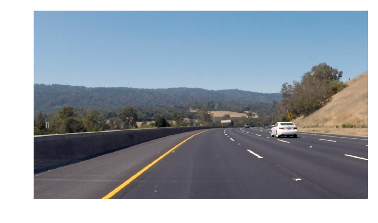

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

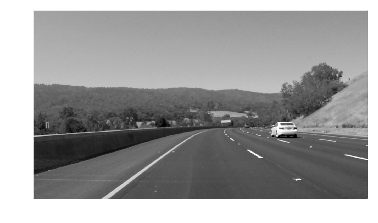

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

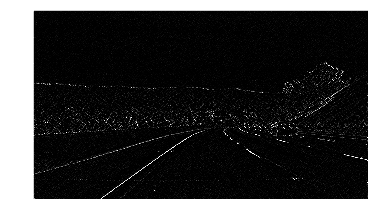

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
sobel_x = sobel_y.T

## TODO: Create and apply a Sobel x operator
filtered_image = cv2.filter2D(gray, -1, sobel_x)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(filtered_image, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


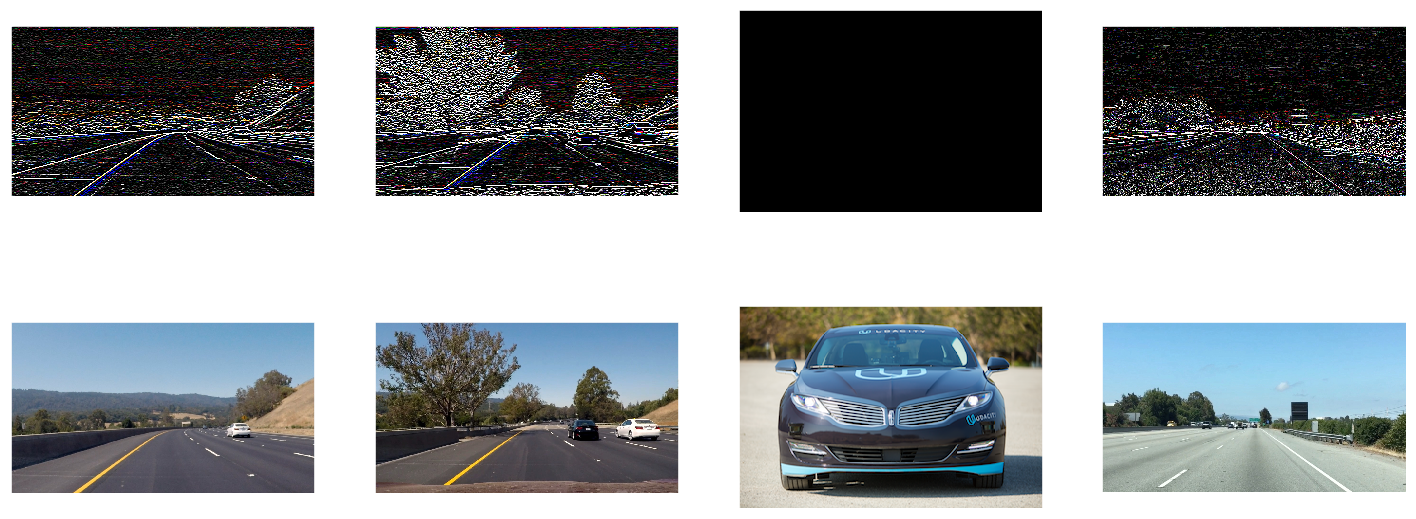

In [12]:

decimal_filter = np.array([
    [-2.5, -0.5, -2.5],
    [1.5, 1.0, 1.5],
    [0.5, 0.5, 0.5]
], dtype=np.float64)

fivexfive_filter = np.array([
    [2,  2,  2,  2,  2],
    [1,  1,  1,  1,  1],
    [0,  0,  0,  0,  0],
    [-1, -1, -1, -1, -1],
    [-2, -2, -2, -2, -2]
], dtype=np.float64)

image_names = ['curved_lane.jpg', 'bridge_trees_example.jpg', 'udacity_sdc.png', 'white_lines.jpg']
images = []
for img_name in image_names:
    images.append(mpimg.imread(f'data/{img_name}'))

fig = plt.figure(figsize=(25, 20))
# Show original
for idx in np.arange(len(images)):
    ax = fig.add_subplot(1, len(images), idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    
# Show filtered images
for idx in np.arange(len(images)):
    ax = fig.add_subplot(2, len(images), idx + 1, xticks=[], yticks=[])
    
    filtered_image = cv2.filter2D(images[idx], -1, decimal_filter)
    filtered_image = cv2.filter2D(filtered_image, -1, fivexfive_filter)
    ax.imshow(np.squeeze(filtered_image))
    